<a href="https://colab.research.google.com/github/tafseeryeamin/Data_Science/blob/main/DS_inaframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

# Generate data
n = 100

data = {
    'CustomerID': [f'CUST{i:03}' for i in range(1, n+1)],
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Age': np.random.randint(18, 70, size=n),
    'SubscriptionPlan': np.random.choice(['Free', 'Basic', 'Premium'], size=n, p=[0.2, 0.5, 0.3]),
    'MonthlySpend': np.round(np.random.normal(50, 20, size=n), 2),
    'TenureMonths': np.random.randint(1, 48, size=n),
    'IsActive': np.random.choice(['Yes', 'No'], size=n, p=[0.7, 0.3]),
    'Churned': np.random.choice(['Yes', 'No'], size=n, p=[0.25, 0.75])
}

df = pd.DataFrame(data)

# Introduce some missing values for realism
for col in ['Age', 'MonthlySpend']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

# Save to CSV
df.to_csv('customer_churn.csv', index=False)

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
# 1. Basic Info
# -------------------------------
print("🔍 Shape of dataset:", df.shape)
print("\n📋 Columns:\n", df.columns.tolist())
print("\n🔎 Data types:\n", df.dtypes)
print("\n🧾 Sample data:\n", df.head())


🔍 Shape of dataset: (100, 8)

📋 Columns:
 ['customerid', 'gender', 'age', 'subscriptionplan', 'monthlyspend', 'tenuremonths', 'isactive', 'churned']

🔎 Data types:
 customerid           object
gender               object
age                 float64
subscriptionplan     object
monthlyspend        float64
tenuremonths          int64
isactive             object
churned              object
dtype: object

🧾 Sample data:
   customerid  gender   age subscriptionplan  monthlyspend  tenuremonths  \
0    CUST001    Male  35.0            Basic         47.14            36   
1    CUST002  Female  43.0            Basic         11.31            33   
2    CUST003    Male  61.0          Premium         53.01            30   
3    CUST004    Male  51.0            Basic         49.69            37   
4    CUST005    Male  27.0            Basic         23.40            23   

  isactive churned  
0       No      No  
1      Yes     Yes  
2      Yes      No  
3      Yes      No  
4      Yes     Yes  


In [6]:
#onestop solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        100 non-null    object 
 1   gender            100 non-null    object 
 2   age               95 non-null     float64
 3   subscriptionplan  100 non-null    object 
 4   monthlyspend      95 non-null     float64
 5   tenuremonths      100 non-null    int64  
 6   isactive          100 non-null    object 
 7   churned           100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.4+ KB


In [7]:
# 2. Summary Statistics
# -------------------------------
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,100,100,CUST001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,100,2,Female,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,95.0,NaN,NaN,NaN,43.926316,14.24276,18.0,31.5,44.0,56.0,69.0
subscriptionplan,100,3,Basic,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthlyspend,95.0,NaN,NaN,NaN,49.109789,20.200698,10.17,35.33,47.29,61.14,111.22
tenuremonths,100.0,NaN,NaN,NaN,24.03,12.342302,1.0,12.0,25.0,35.0,46.0
isactive,100,2,Yes,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churned,100,2,No,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Missing values:
 customerid          0
gender              0
age                 5
subscriptionplan    0
monthlyspend        5
tenuremonths        0
isactive            0
churned             0
dtype: int64


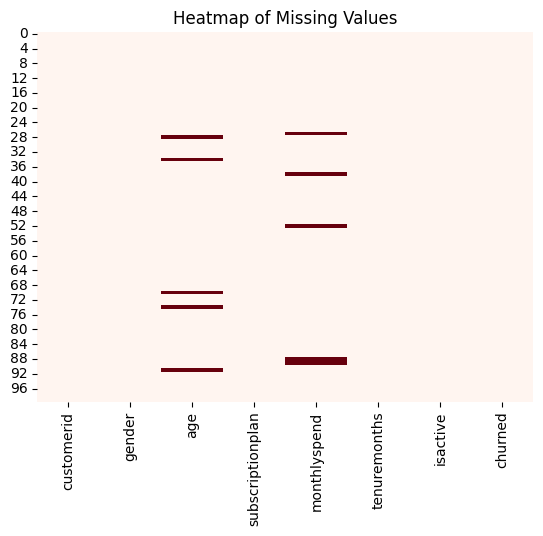

In [8]:
# 3. Missing Values
# -------------------------------
print("\n Missing values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Heatmap of Missing Values')
plt.show()

In [9]:
def missing_values_table(df):
 mis_val = df.isnull().sum()
 mis_val_percent = 100 * df.isnull().sum() / len(df)
 mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
 mis_val_table_ren_columns = mis_val_table.rename(
 columns = {0 : 'Missing Values', 1 : '% of Total Values'})
 mis_val_table_ren_columns = mis_val_table_ren_columns[
 mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
 '% of Total Values', ascending=False).round(1)
 print ("Your selected dataframe has " + str(df.shape[1]) + " columns\n"
 "There are " + str(mis_val_table_ren_columns.shape[0]) +
 " columns that have missing values.")
 return mis_val_table_ren_columns
missing_values_table(df)


Your selected dataframe has 8 columns
There are 2 columns that have missing values.


,Missing Values,% of Total Values
age,5,5.0
monthlyspend,5,5.0


In [21]:
rows_with_nan = []
for index, row in df[['age']].iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index) # This line should be indented
print(rows_with_nan)

[28, 34, 70, 74, 91]


In [10]:
# 4. Duplicates
# -------------------------------
duplicates = df.duplicated()
print("\n📎 Duplicated rows:", duplicates.sum())
if duplicates.sum() > 0:
    display(df[duplicates].head())


📎 Duplicated rows: 0


In [11]:
# 5. Unique Values per Column
# -------------------------------
print("\n🔢 Unique values per column:\n", df.nunique())



🔢 Unique values per column:
 customerid          100
gender                2
age                  45
subscriptionplan      3
monthlyspend         94
tenuremonths         41
isactive              2
churned               2
dtype: int64


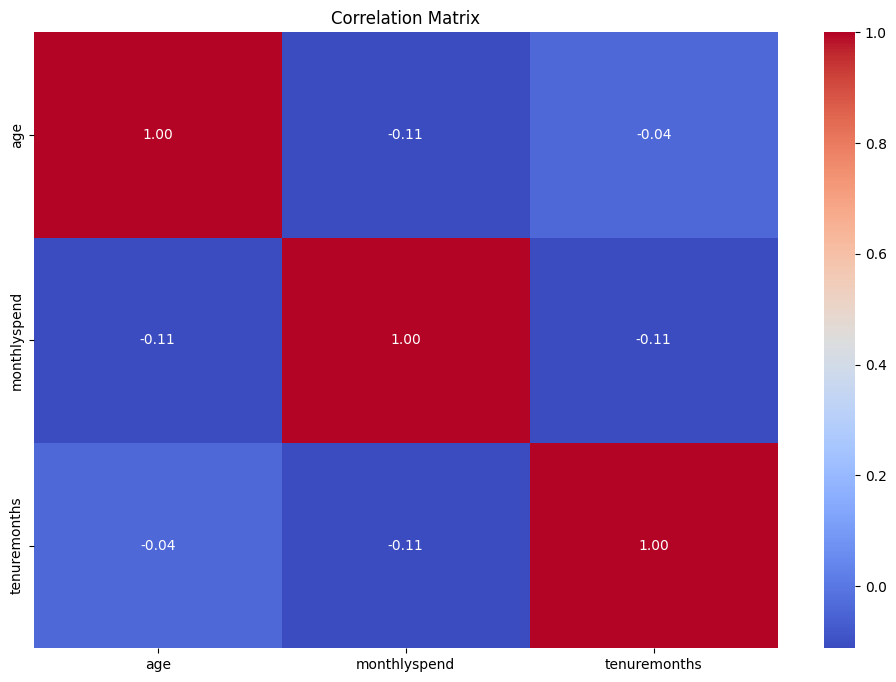

In [12]:
# 6. Correlation Matrix (Numerical)
# -------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

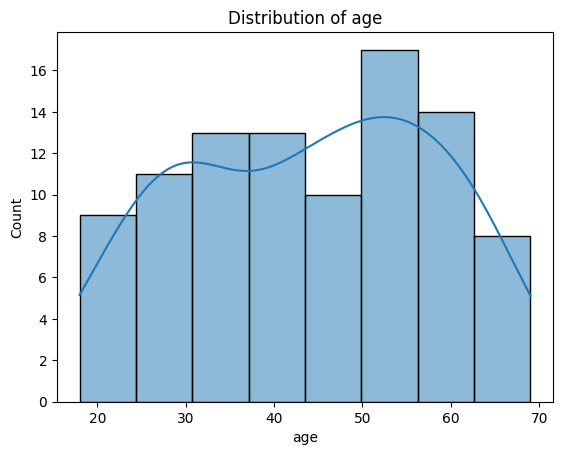

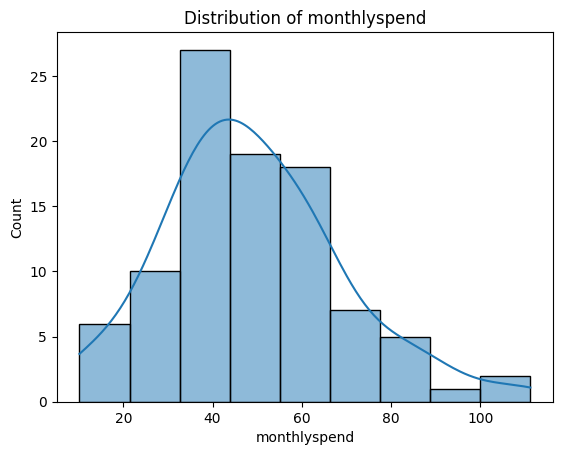

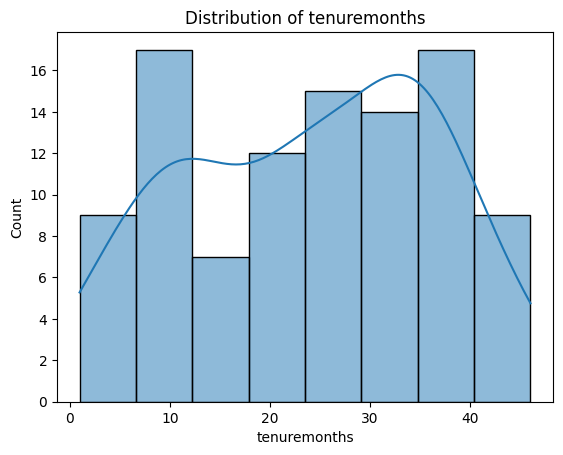

In [13]:
# 7. Distribution of Numerical Features
# -------------------------------
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

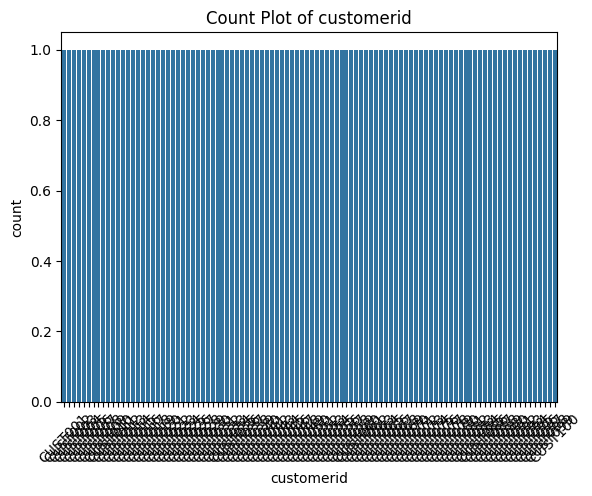

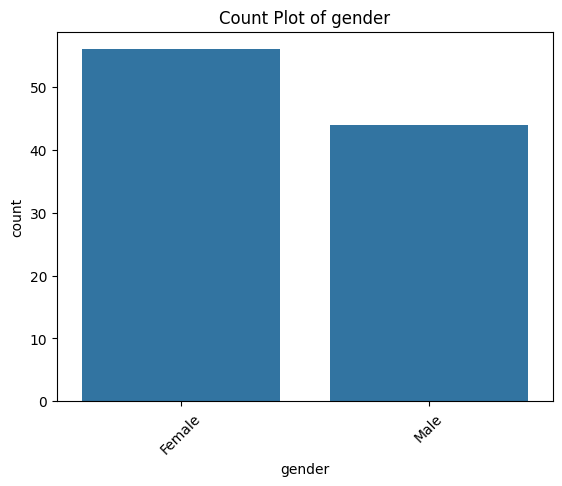

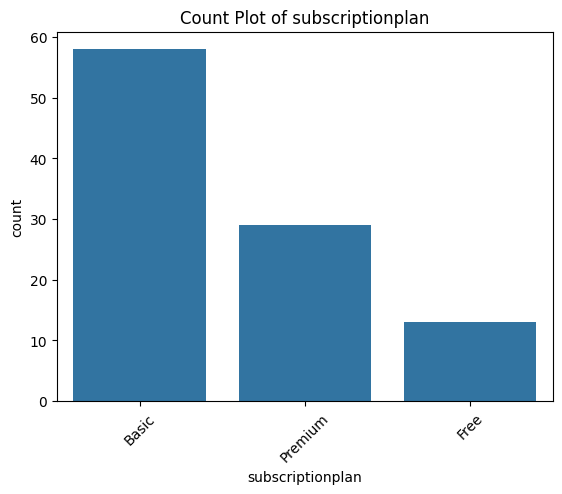

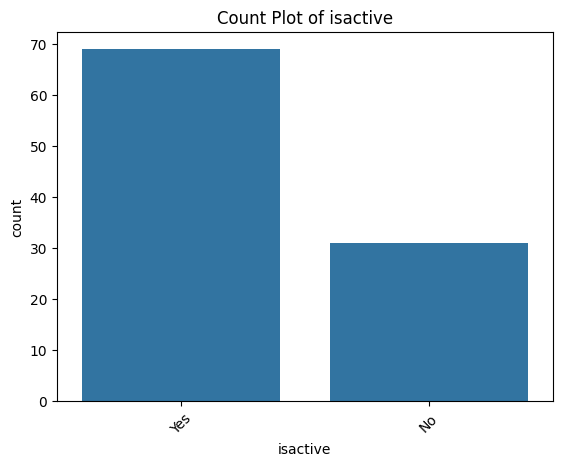

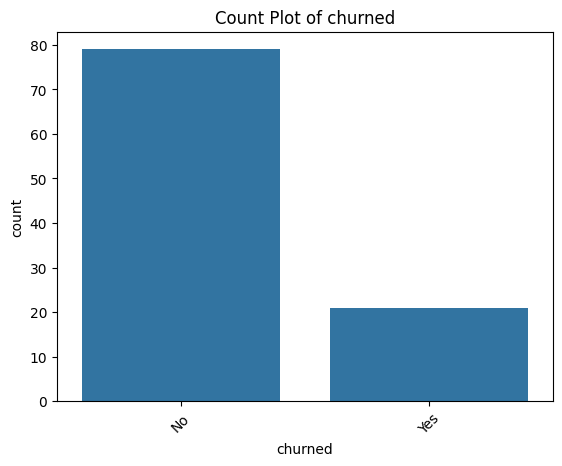

In [14]:
# 8. Count Plots for Categorical Columns
# -------------------------------
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

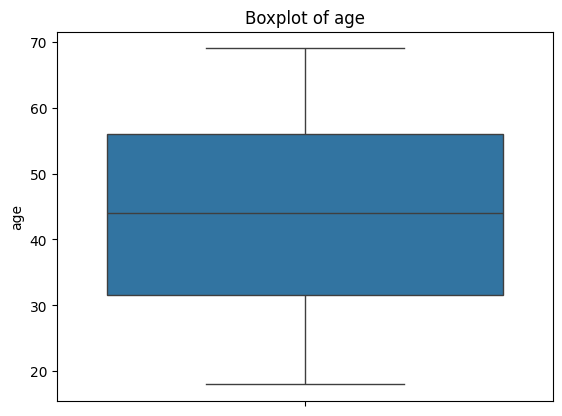

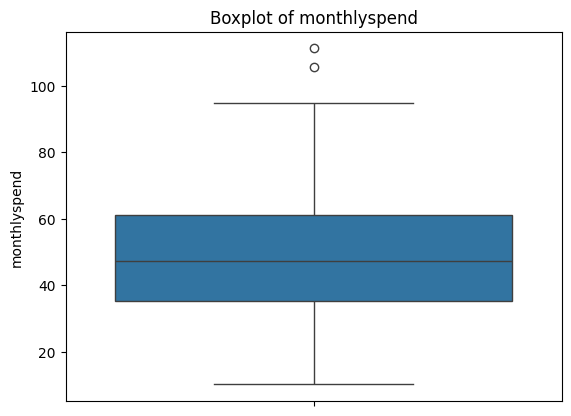

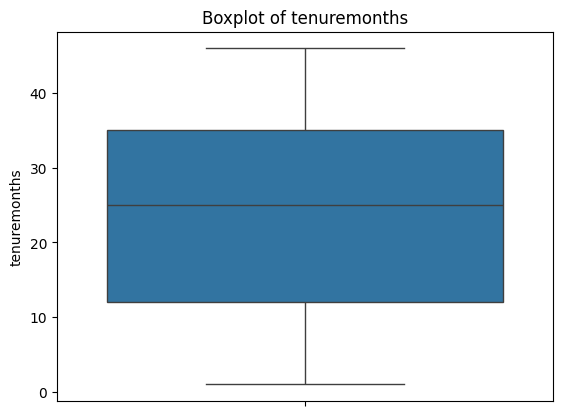

In [15]:
# 9. Boxplots to Check Outliers
# -------------------------------
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

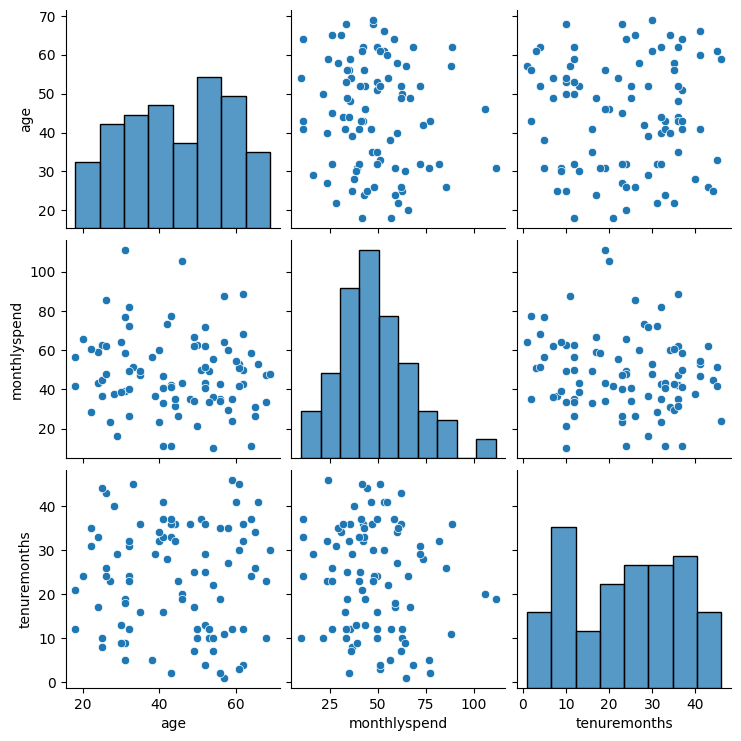

In [16]:
# 10. Pairplot (Optional for small datasets)
# -------------------------------
sns.pairplot(df[numerical_cols].dropna())
#plt.title("Pairplot of Numerical Features")
plt.show()

In [17]:
# 11. Value Counts of Target Column (if exists)
# -------------------------------
target_col = 'IsActive'  # Replace if known
if target_col in df.columns:
    print("\n📌 Target distribution:\n", df[target_col].value_counts())
    sns.countplot(data=df, x=target_col)
    plt.title(f'Distribution of Target Variable: {target_col}')
    plt.show()

In [18]:
target_col = 'IsActive'
if target_col in df.columns:
    print(df.groupby(target_col).mean(numeric_only=True))

In [19]:
df1= pd.DataFrame(data)

df_dummies = pd.get_dummies(df1, columns=['Gender', 'SubscriptionPlan', 'IsActive', 'Churned'], drop_first=True,dtype=int)

# Display the result
df_dummies.head()

,CustomerID,Age,MonthlySpend,TenureMonths,Gender_Male,SubscriptionPlan_Free,SubscriptionPlan_Premium,IsActive_Yes,Churned_Yes
0,CUST001,35,47.14,36,1,0,0,0,0
1,CUST002,43,11.31,33,0,0,0,1,1
2,CUST003,61,53.01,30,1,0,1,1,0
3,CUST004,51,49.69,37,1,0,0,1,0
4,CUST005,27,23.40,23,1,0,0,1,1


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
cat_cols = ['Gender', 'SubscriptionPlan', 'IsActive', 'Churned']

# Separate the features
df_cat = df1[cat_cols]
df_num = df1.drop(columns=cat_cols + ['CustomerID'])  # exclude ID and categorical

# Initialize encoder
#encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical data
encoded = encoder.fit_transform(df_cat)

# Get new column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# Create DataFrame of encoded features
df_encoded = pd.DataFrame(encoded, columns=encoded_cols)

# Combine everything
df_encoded  = pd.concat([df1[['CustomerID']], df_num.reset_index(drop=True), df_encoded], axis=1)

# Show result
df_encoded.head()

,CustomerID,Age,MonthlySpend,TenureMonths,Gender_Male,SubscriptionPlan_Free,SubscriptionPlan_Premium,IsActive_Yes,Churned_Yes
0,CUST001,35,47.14,36,1.0,0.0,0.0,0.0,0.0
1,CUST002,43,11.31,33,0.0,0.0,0.0,1.0,1.0
2,CUST003,61,53.01,30,1.0,0.0,1.0,1.0,0.0
3,CUST004,51,49.69,37,1.0,0.0,0.0,1.0,0.0
4,CUST005,27,23.40,23,1.0,0.0,0.0,1.0,1.0
